In [7]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/covid_19_train.csv')

In [3]:
data

,id,age_quantile,covid_19,Patient addmited to regular ward,Patient addmited to semi-intensive unit,Patient addmited to intensive care unit,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,f60118eba52d74a,15,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,024a42e8ac351fe,0,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6eb7cb571bdedaf,5,0,0,0,0,2.090489,2.045308,-0.768649,1.469188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,a038ae69a3f0de9,16,0,0,0,0,0.579844,0.416252,-0.630469,-0.999063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6728175fd3bb714,6,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,83bec24e7854748,19,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3996,0fdd724e1924a41,3,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3997,877b6528c0e6309,7,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3998,622968492e239f9,14,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.isna().sum().values

array([   0,    0,    0,    0,    0,    0, 3572, 3572, 3573, 3575, 3573,
       3573, 3573, 3573, 3573, 3573, 3573, 3573, 3573, 3573, 3853, 3022,
       3022, 3022, 3024, 3024, 3024, 4000, 3024, 3024, 3024, 3024, 3024,
       3024, 3024, 3024, 3024, 3024, 3024, 3637, 3726, 3644, 3706, 3743,
       3742, 3418, 3418, 3844, 3843, 3898, 3877, 3877, 3877, 3904, 3965,
       3757, 3977, 3904, 3904, 3904, 3904, 4000, 3904, 3904, 3904, 3931,
       3931, 3931, 3931, 3931, 3931, 3960, 3954, 3954, 3954, 3954, 3963,
       3999, 3954, 3955, 3960, 4000, 3954, 3954, 3954, 3956, 3954, 3954,
       3954, 4000, 3936, 3906, 3932, 4000, 3998, 3926, 3984, 3978, 3997,
       4000, 3994, 3978, 3978, 3978, 3978, 3978, 3978, 3978, 3984, 3990,
       3978])

In [33]:
data['Mycoplasma pneumoniae'].isna().sum()

4000

In [169]:
digitized_df = None
initialized = False

for col in data.columns[6:]:
    try:
        column_data = data[col]
        percentile_points = np.linspace(0,1,10) * 100
        bins = np.percentile(column_data.dropna(), percentile_points)
        digitized_data = np.digitize(column_data, bins).astype('int')
        col_df = pd.DataFrame(data=np.array([digitized_data]).T, columns=[col])
    #     col_df

        if not initialized:
            initialized = True
            digitized_df = col_df
        else:
            digitized_df = digitized_df.join(col_df)
    except:
        print(f'Failed to process column: {col}')

# nullified_data[column_data.isna()] = np.nan
# nullified_data
# digitized_data


# column_data

Failed to process column: Mycoplasma pneumoniae
Failed to process column: Fio2 (venous blood gas analysis)
Failed to process column: Urine - Esterase
Failed to process column: Urine - Aspect
Failed to process column: Urine - pH
Failed to process column: Urine - Hemoglobin
Failed to process column: Urine - Bile pigments
Failed to process column: Urine - Ketone Bodies
Failed to process column: Urine - Nitrite
Failed to process column: Urine - Urobilinogen
Failed to process column: Urine - Protein
Failed to process column: Urine - Sugar
Failed to process column: Urine - Leukocytes
Failed to process column: Urine - Crystals
Failed to process column: Urine - Hyaline cylinders
Failed to process column: Urine - Granular cylinders
Failed to process column: Urine - Yeasts
Failed to process column: Urine - Color
Failed to process column: Partial thromboplastin time (PTT) 
Failed to process column: Prothrombin time (PT), Activity
Failed to process column: Lipase dosage
Failed to process column: D

In [175]:
nullified_df = digitized_df
nullified_df[data.isna()] = np.nan

In [174]:
nullified_df

,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)


In [48]:
prepared_df = data.iloc[:,1:6].join(nullified_df)

In [172]:
prepared_df

,age_quantile,covid_19,Patient addmited to regular ward,Patient addmited to semi-intensive unit,Patient addmited to intensive care unit,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,15,0,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,0,0,0,0,9.0,9.0,2.0,9.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16,0,0,0,0,7.0,6.0,3.0,2.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,0,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,19,0,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3996,3,0,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3997,7,0,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3998,14,0,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [324]:
prepared_df['pO2 (arterial blood gas analysis)'].isna().sum()

3978

In [145]:
clean_sampled_data[clean_sampled_data.covid_19 == 1]

,covid_19,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC)
32,1,5.0,6.0,3.0,7.0,5.0,2.0,8.0
298,1,7.0,7.0,2.0,4.0,7.0,4.0,4.0
324,1,1.0,1.0,6.0,9.0,1.0,9.0,5.0
431,1,9.0,8.0,4.0,4.0,8.0,4.0,5.0
484,1,7.0,7.0,1.0,6.0,6.0,6.0,6.0
514,1,8.0,9.0,1.0,6.0,9.0,8.0,9.0
575,1,7.0,8.0,1.0,7.0,7.0,9.0,7.0
677,1,5.0,4.0,8.0,2.0,6.0,7.0,2.0
733,1,3.0,3.0,1.0,7.0,2.0,6.0,2.0
767,1,7.0,7.0,2.0,3.0,8.0,4.0,4.0


In [509]:
sampled_data = prepared_df.iloc[:,[1,5,6,7,8]]
clean_sampled_data = sampled_data.dropna(axis=0)

from pgmpy.estimators import HillClimbSearch, BicScore, PC, TreeSearch, ExhaustiveSearch
# est = PC(clean_sampled_data)
est = ExhaustiveSearch(data=clean_sampled_data)
best_model = est.estimate()

In [131]:
clean_sampled_data.columns

Index(['covid_19', 'Hematocrit', 'Hemoglobin', 'Platelets',
       'Mean platelet volume', 'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)'],
      dtype='object')

In [60]:
import networkx as nx

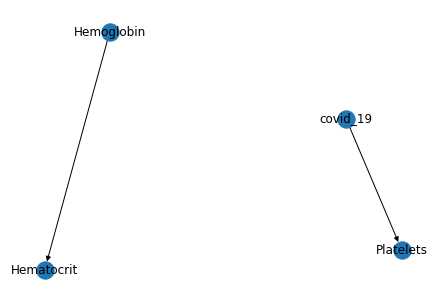

In [510]:
# best_model.edges
best_model.nodes()
G = nx.DiGraph(directed=True)
G.add_edges_from(best_model.edges)
nx.draw(G, with_labels=True)

In [491]:
best_model = {
    'edges': [('covid_19', x) for x in sampled_data.columns if x != 'covid_19']
}

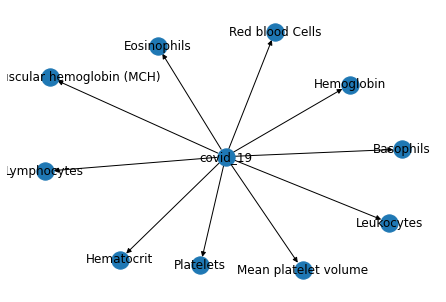

In [492]:
# best_model.edges
# best_model.nodes()
G = nx.DiGraph(directed=True)
G.add_edges_from(best_model['edges'])
nx.draw(G, with_labels=True)

In [493]:
best_model = {
    'edges': [('covid_19', x) for x in sampled_data.columns if x != 'covid_19']
}

In [494]:
from pgmpy.models import BayesianNetwork

In [495]:
bn = BayesianNetwork()

# bn.add_nodes_from()
# bn.add_edges_from(best_model.edges)
bn.add_edges_from(best_model['edges'])

In [496]:
network_nodes = list(bn.nodes())

In [497]:
network_nodes

['covid_19',
 'Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Mean platelet volume',
 'Red blood Cells',
 'Lymphocytes',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils']

In [498]:
sampled_data.columns

Index(['covid_19', 'Hematocrit', 'Hemoglobin', 'Platelets',
       'Mean platelet volume', 'Red blood Cells', 'Lymphocytes', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils'],
      dtype='object')

In [499]:
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
train_data = sampled_data.loc[:,network_nodes]
bn.fit(data=train_data, estimator=MaximumLikelihoodEstimator)

In [500]:
bn.get_cpds()

[<TabularCPD representing P(covid_19:2) at 0x1534cd160>,
 <TabularCPD representing P(Hematocrit:10 | covid_19:2) at 0x15aadb880>,
 <TabularCPD representing P(Hemoglobin:10 | covid_19:2) at 0x15aadba00>,
 <TabularCPD representing P(Platelets:10 | covid_19:2) at 0x15aadbd00>,
 <TabularCPD representing P(Mean platelet volume:10 | covid_19:2) at 0x1395caaf0>,
 <TabularCPD representing P(Red blood Cells:10 | covid_19:2) at 0x13950ab20>,
 <TabularCPD representing P(Lymphocytes:10 | covid_19:2) at 0x15a9d3520>,
 <TabularCPD representing P(Leukocytes:10 | covid_19:2) at 0x15aadbb20>,
 <TabularCPD representing P(Basophils:8 | covid_19:2) at 0x13967bca0>,
 <TabularCPD representing P(Mean corpuscular hemoglobin (MCH):10 | covid_19:2) at 0x1534cd910>,
 <TabularCPD representing P(Eosinophils:9 | covid_19:2) at 0x139671880>]

In [501]:
# print(bn.get_cpds('Hemoglobin'))

In [502]:
bn.check_model()

True

In [503]:
from pgmpy.inference import VariableElimination
inference = VariableElimination(bn)
print(inference.query(variables=['covid_19'], evidence={ 'Platelets': 1 }))


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-------------+-----------------+
| covid_19    |   phi(covid_19) |
+=============+=================+
| covid_19(0) |          0.6087 |
+-------------+-----------------+
| covid_19(1) |          0.3913 |
+-------------+-----------------+


In [506]:
positives = sampled_data[sampled_data.covid_19 == 1]
correct = 0
total = 0

for index, row in sampled_data.iterrows():
    evidence = {}
    for col in network_nodes:
        if not np.isnan(row[col]) and col != 'covid_19':
            evidence[col] = row[col]
            
    if len(evidence.keys()) == 0:
        continue
        
#     print(evidence)
#     print(row.covid_19)
    res = inference.map_query(variables=['covid_19'], evidence=evidence, show_progress=False)
    
    total += 1
    if row.covid_19 == res['covid_19']:
        correct += 1
        
    print(f'{correct}/{total}: {correct/total}')
    

1/1: 1.0
2/2: 1.0
2/3: 0.6666666666666666
3/4: 0.75
4/5: 0.8
5/6: 0.8333333333333334
6/7: 0.8571428571428571
7/8: 0.875
8/9: 0.8888888888888888
9/10: 0.9
10/11: 0.9090909090909091
11/12: 0.9166666666666666
12/13: 0.9230769230769231
13/14: 0.9285714285714286
14/15: 0.9333333333333333
15/16: 0.9375
16/17: 0.9411764705882353
17/18: 0.9444444444444444
18/19: 0.9473684210526315
19/20: 0.95
20/21: 0.9523809523809523
21/22: 0.9545454545454546
22/23: 0.9565217391304348
23/24: 0.9583333333333334
24/25: 0.96
25/26: 0.9615384615384616
26/27: 0.9629629629629629
26/28: 0.9285714285714286
27/29: 0.9310344827586207
28/30: 0.9333333333333333
29/31: 0.9354838709677419
30/32: 0.9375
31/33: 0.9393939393939394
32/34: 0.9411764705882353
33/35: 0.9428571428571428
34/36: 0.9444444444444444
34/37: 0.918918918918919
35/38: 0.9210526315789473
36/39: 0.9230769230769231
37/40: 0.925
38/41: 0.926829268292683
39/42: 0.9285714285714286
40/43: 0.9302325581395349
41/44: 0.9318181818181818
42/45: 0.9333333333333333
43/

278/318: 0.8742138364779874
279/319: 0.8746081504702194
280/320: 0.875
281/321: 0.8753894080996885
282/322: 0.8757763975155279
283/323: 0.8761609907120743
284/324: 0.8765432098765432
285/325: 0.8769230769230769
286/326: 0.8773006134969326
287/327: 0.8776758409785933
288/328: 0.8780487804878049
289/329: 0.878419452887538
290/330: 0.8787878787878788
291/331: 0.879154078549849
291/332: 0.8765060240963856
292/333: 0.8768768768768769
293/334: 0.8772455089820359
294/335: 0.8776119402985074
294/336: 0.875
295/337: 0.8753709198813057
295/338: 0.8727810650887574
296/339: 0.8731563421828908
297/340: 0.8735294117647059
298/341: 0.873900293255132
299/342: 0.8742690058479532
300/343: 0.8746355685131195
301/344: 0.875
302/345: 0.8753623188405797
303/346: 0.8757225433526011
303/347: 0.8731988472622478
303/348: 0.8706896551724138
304/349: 0.8710601719197708
305/350: 0.8714285714285714
306/351: 0.8717948717948718
306/352: 0.8693181818181818
307/353: 0.8696883852691218
308/354: 0.8700564971751412
309/35